## Initializations, module imports, and compatibility headers

In [3]:
# main python2 compatibility import
from __future__ import print_function, division

# sage compatibility
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.7)

## Integrators

The integrators are provided in the separate modules referred below.
The source code can be found in the `integrators` folder

In [4]:
# RungeKutta4 for the damped harmonic oscillator
# with dumping paramter a and regularized relative
# error function
from integrators.common import rk4, relerr

# Symplectic integrators for the damped harmonic
# oscillator with dumping parameter a
from integrators.oscillator import euler, leapfrog, \
    ruth3, variational_noncontact#, leapfrog2, pseudoleapfrog

# Contact integrators as described in the paper
# for the damped harmonic oscillator with dumping parameter a
from integrators.oscillator import contact, symcontact, midpoint

# Lagrange-d'Alembert integrators for the damped
# harmonic oscillator with dumping parameter a
from integrators.oscillator import lagrange_dalembert

## Comparative plots generator

In [31]:
def cmp_plot(init, tspan, a, h, delta, save=False):
    
    # The reference solution is computed using the leapfrog
    # algorithm with much finer error step
    r = leapfrog(init, tspan, a, h/delta)

    s1 = contact(init, tspan, a, h)
    s9 = lagrange_dalembert(init, tspan, a, h)
    
    timerange = np.arange(tspan[0], tspan[1], h)
    ref = r[::delta,1]
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(211)
    plt.title("Solución para $h={}$, $\\alpha={}$, $(p_0,q_0)={}$".
              format(h, a, tuple(init))
             )
    plt.plot(timerange, s1[:,1], label="Contacto (orden 1)", linestyle="--", marker='+', ms=12, markevery=10)
    plt.plot(timerange, s9[:,1], label="LA (orden 1)", linestyle=":", marker='.', ms=12, markevery=0)
    plt.plot(np.arange(tspan[0], tspan[1], h/delta), r[:,1],
             label="Referencia", linestyle="-")
    plt.legend(loc='upper right')
    
    plt.subplot(212)
    plt.title("Error Relativo")
    plt.plot(timerange, relerr(ref,s1[:,1]), label="Contacto (orden 1)", linestyle="--", marker='+', ms=12, markevery=20)
    plt.plot(timerange, relerr(ref,s9[:,1]), label="LA (orden 1)", linestyle=":", marker='.', ms=12, markevery=20)
    plt.legend()
    
    plt.tight_layout()

    if save:
        name = "damped{}.pdf".format(a)
        plt.savefig(name, format="pdf", transparent=True)
    
    plt.show()

## Comparative Plots

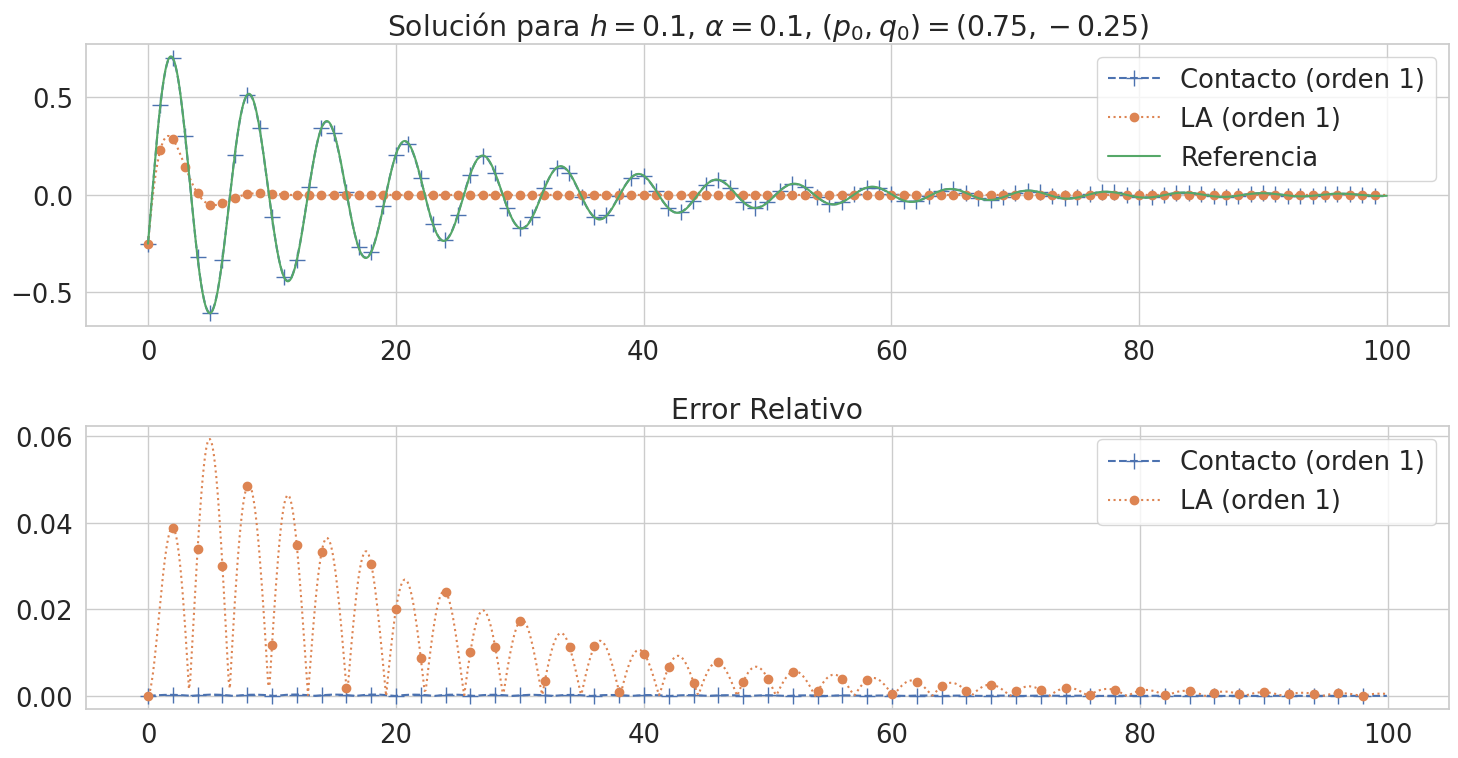

In [33]:
init = (.75, -.25)
tspan = (0.0, 100.0)
a = 0.1
h = 0.1
delta = 10

cmp_plot(init, tspan, a, h, delta, save=True)

/usr/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


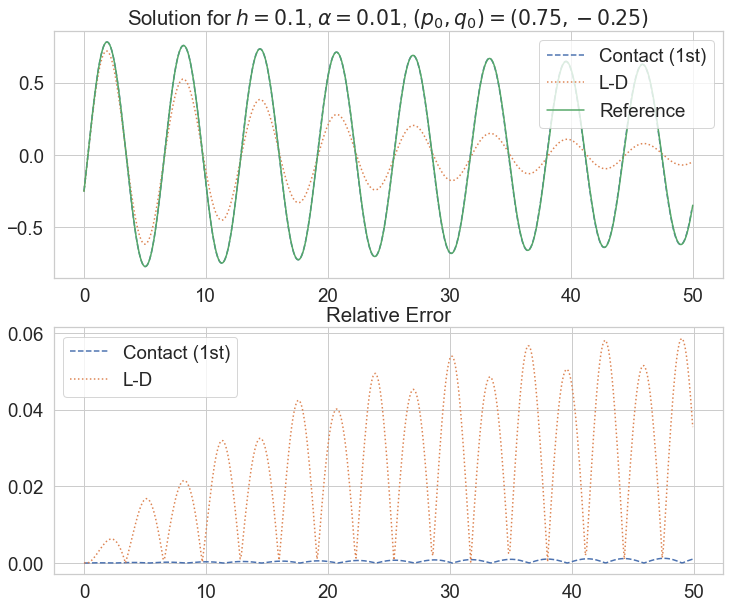

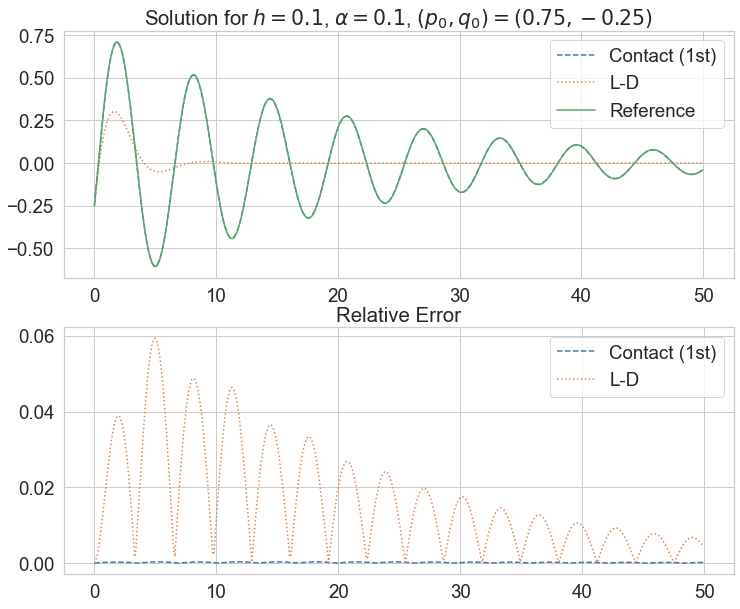

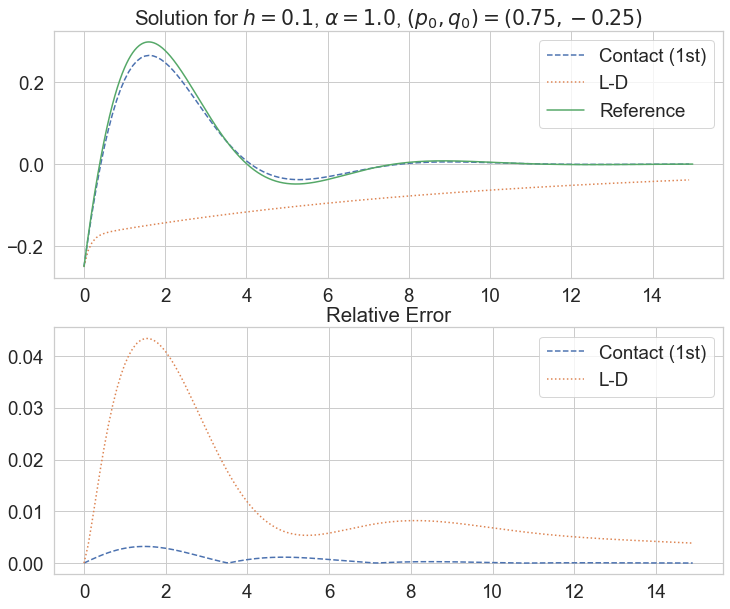

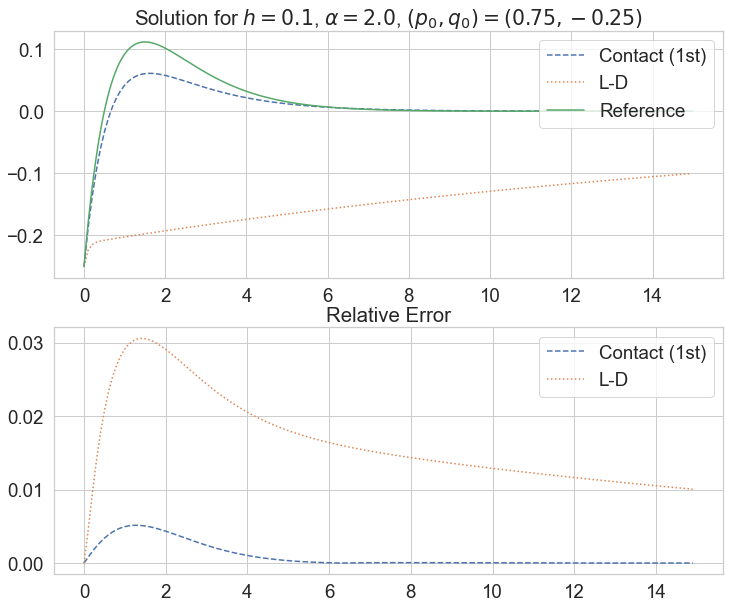

In [5]:
init = (.75,-.25)
delta = 10
tspan = (0.0, 50.0)

for a in [.01, 0.1, 1.0, 2.0]:
    if a > .5:
        tspan = (0.0, 15.0)
    for h in [0.1]:
        cmp_plot(init, tspan, a, h, delta, save=True)